In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import streamlit as st

In [3]:
!dir

 El volumen de la unidad C no tiene etiqueta.
 El n�mero de serie del volumen es: 00AC-7514

 Directorio de c:\Users\cmu�oz\Desktop\olist-interactive-dashboad\notebooks

14/05/2025  13:18    <DIR>          .
13/05/2025  13:17    <DIR>          ..
14/05/2025  12:30           144.438 clean-data-notebook.ipynb
14/05/2025  13:19           864.058 ejercicios.ipynb
14/05/2025  13:18            47.865 use-data-notebook.ipynb
               3 archivos      1.056.361 bytes
               2 dirs  408.720.646.144 bytes libres


In [4]:
dir_prefix = '../resources/raw_data/olist_{}_dataset.csv'
df_customers_original = pd.read_csv(dir_prefix.format('customers'), encoding='utf-8')
df_customers = df_customers_original.copy()
df_customers.name = 'customers'

df_order_items_original = pd.read_csv(dir_prefix.format('order_items'), encoding='utf-8')
df_order_items = df_order_items_original.copy()
df_order_items.name = 'order_items'

df_order_payments_original = pd.read_csv(dir_prefix.format('order_payments'), encoding='utf-8')
df_order_payments = df_order_payments_original.copy()
df_order_payments.name = 'order_payments'

df_order_reviews_original = pd.read_csv(dir_prefix.format('order_reviews'), encoding='utf-8')
df_order_reviews = df_order_reviews_original.copy()
df_order_reviews.name = 'order_reviews'

df_orders_original = pd.read_csv(dir_prefix.format('orders'), encoding='utf-8')
df_orders = df_orders_original.copy()
df_orders.name = 'orders'

df_products_original = pd.read_csv(dir_prefix.format('products'), encoding='utf-8')
df_products = df_products_original.copy()
df_products.name = 'products'

df_sellers_original = pd.read_csv(dir_prefix.format('sellers'), encoding='utf-8')
df_sellers = df_sellers_original.copy()
df_sellers.name = 'sellers'

df_translations_original = pd.read_csv('../resources/raw_data/product_category_name_translation.csv', encoding='utf-8')
df_translations = df_translations_original.copy()
df_translations.name = 'translations'


In [5]:
all_df = [df_customers, df_order_items, df_order_payments, df_order_reviews, df_orders, df_products, df_sellers, df_translations]

In [6]:
[print(f'Nulos en {df.name} ->\n{df.isna().sum()}\n\n') for df in all_df]

Nulos en customers ->
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64


Nulos en order_items ->
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64


Nulos en order_payments ->
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64


Nulos en order_reviews ->
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64


Nulos en orders ->
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timesta

[None, None, None, None, None, None, None, None]

In [7]:
for df in all_df:
    print(f"---- {df.name.upper()} ----", end='\n\n')
    print(df.info())
    print("\n---------------------------------------------\n")

---- CUSTOMERS ----

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None

---------------------------------------------

---- ORDER_ITEMS ----

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3

In [8]:
for df in all_df:
    print(f"---- {df.name.upper()} ----", end='\n\n')
    print(f"Parsing Object dtype to String dtype on {df.name.upper()}", end='\n\n')
    object_cols = df.select_dtypes(include='object').columns
    df[object_cols] = df[object_cols].astype(pd.StringDtype())
    print(df.info())
    print("\n---------------------------------------------\n")

---- CUSTOMERS ----

Parsing Object dtype to String dtype on CUSTOMERS

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  string
 1   customer_unique_id        99441 non-null  string
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  string
 4   customer_state            99441 non-null  string
dtypes: int64(1), string(4)
memory usage: 3.8 MB
None

---------------------------------------------

---- ORDER_ITEMS ----

Parsing Object dtype to String dtype on ORDER_ITEMS

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  string 
 

In [9]:

for df in all_df:
    print(f"Buscando fechas en {df.name}: ")
    string_columns = df.select_dtypes(['object', 'string']).columns.values
    date_columns = [column for column in string_columns if 
        (('at' in column.lower()) 
            and 
            ('state' not in column.lower()) 
            and 
            ('status' not in column.lower())
            and
            ('category' not in column.lower())
            ) 
        or 
        ('timestamp' in column.lower()) 
        or 
        ('date' in column.lower())]
        
    if date_columns:
        print(f"Se encontraron columnas con fechas,\n\n {date_columns}")
        for column in date_columns:
            print(f"Parseando {column}")
            df[column] = pd.to_datetime(df[column])

    else:
        print("No se han encontrado columnas de Fechas")

    print()
    
        

Buscando fechas en customers: 
No se han encontrado columnas de Fechas

Buscando fechas en order_items: 
Se encontraron columnas con fechas,

 ['shipping_limit_date']
Parseando shipping_limit_date

Buscando fechas en order_payments: 
No se han encontrado columnas de Fechas

Buscando fechas en order_reviews: 
Se encontraron columnas con fechas,

 ['review_creation_date', 'review_answer_timestamp']
Parseando review_creation_date
Parseando review_answer_timestamp

Buscando fechas en orders: 
Se encontraron columnas con fechas,

 ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
Parseando order_purchase_timestamp
Parseando order_approved_at
Parseando order_delivered_carrier_date
Parseando order_delivered_customer_date
Parseando order_estimated_delivery_date

Buscando fechas en products: 
No se han encontrado columnas de Fechas

Buscando fechas en sellers: 
No se han encontrado columnas de Fech

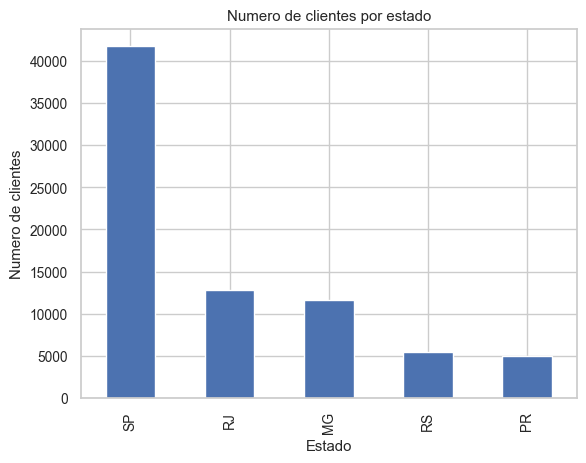

In [25]:
df_customers['customer_state'].value_counts().head(5).plot(kind='bar')
plt.title('Numero de clientes por estado')
plt.xlabel('Estado')
plt.ylabel('Numero de clientes')
plt.show()

--- SP ---
     customer_state          customer_city  num_customers
2188             SP              sao paulo          15540
1741             SP               campinas           1444
1848             SP              guarulhos           1189
2172             SP  sao bernardo do campo            938
2163             SP            santo andre            796
2022             SP                 osasco            746
2170             SP                 santos            713
2183             SP    sao jose dos campos            691
2207             SP               sorocaba            633
1931             SP                jundiai            565

--- RJ ---
     customer_state          customer_city  num_customers
1213             RJ         rio de janeiro           6882
1184             RJ                niteroi            849
1186             RJ            nova iguacu            442
1225             RJ            sao goncalo            409
1148             RJ        duque de caxias       

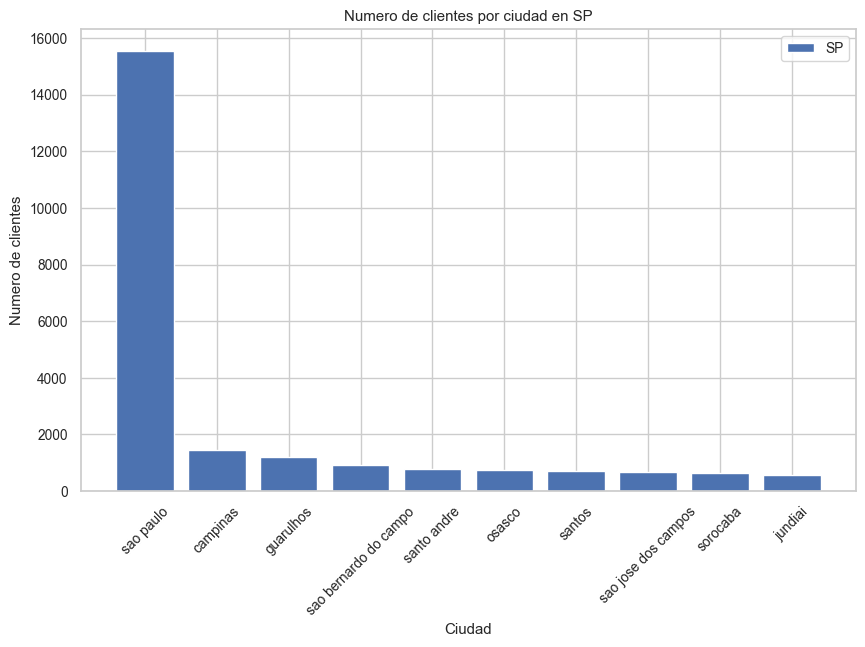

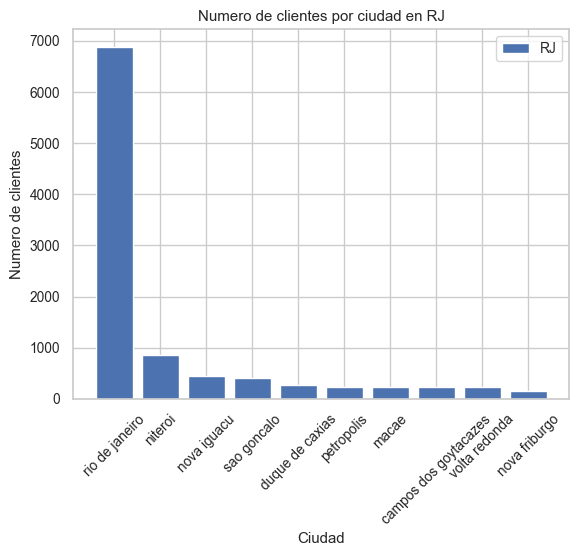

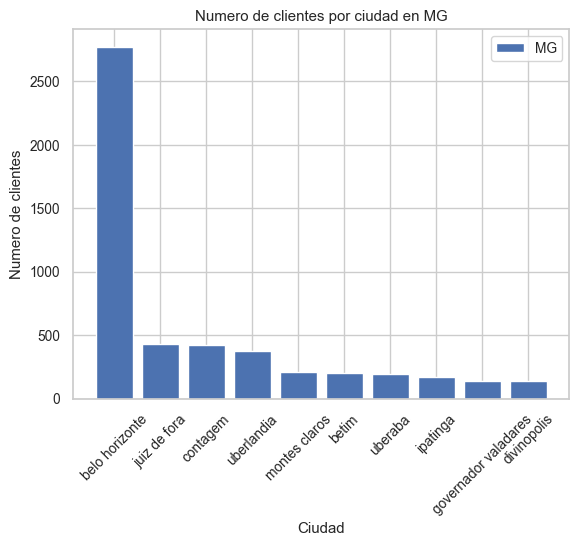

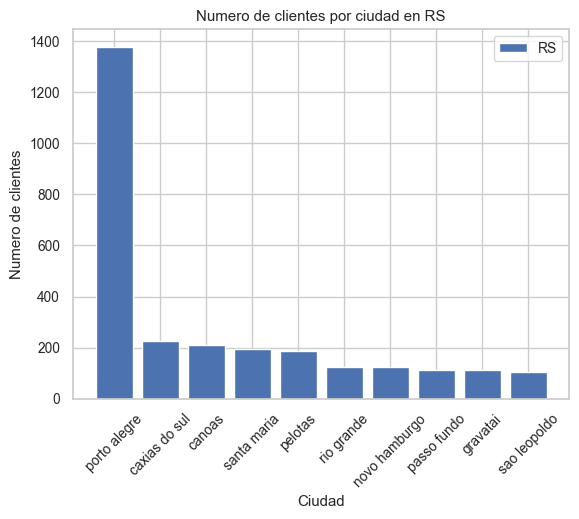

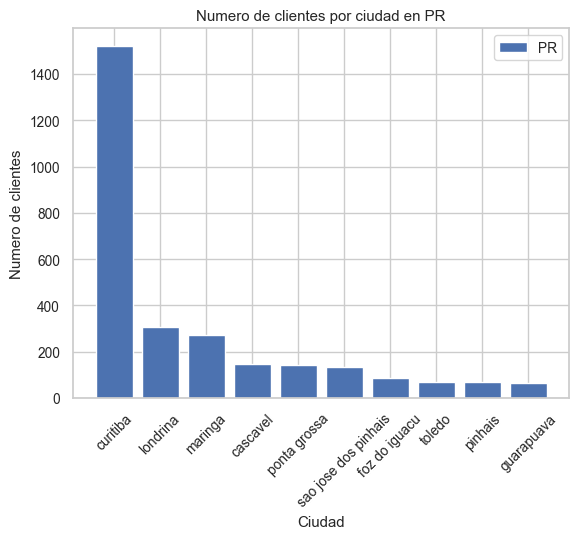

2025-05-14 13:27:27.101 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-14 13:27:27.104 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-14 13:27:27.105 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-14 13:27:27.106 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-14 13:27:27.108 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-14 13:27:27.109 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-14 13:27:27.109 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-14 13:27:27.109 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

In [27]:
customers_per_state = df_customers['customer_state'].value_counts()
top_5_cps = customers_per_state.head(5)
 
top_5_states = top_5_cps.index.tolist()
df_top5 = df_customers[df_customers['customer_state'].isin(top_5_states)]
 
customers_per_city_state = (
    df_top5.groupby(['customer_state', 'customer_city'])
           .size()
           .reset_index(name='num_customers')
           .sort_values(['customer_state', 'num_customers'], ascending=[True, False])
)

customers_per_city_state

for state in top_5_states:
    print(f"--- {state} ---")
    top_cities = customers_per_city_state[customers_per_city_state['customer_state'] == state].head(10)
    print(f"{top_cities}\n")

plt.figure(figsize=(10, 6))
for state in top_5_states:
    top_cities = customers_per_city_state[customers_per_city_state['customer_state'] == state].head(10)
    plt.bar(top_cities['customer_city'], top_cities['num_customers'], label=state)
    plt.title(f'Numero de clientes por ciudad en {state}')
    plt.xlabel('Ciudad')
    plt.ylabel('Numero de clientes')
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

st.title('Numero de clientes por estado')
st.write('Selecciona el estado que deseas ver')
selected_state = st.selectbox('Selecciona el estado', top_5_states)
st.write(f'Clientes en {selected_state}')
top_cities = customers_per_city_state[customers_per_city_state['customer_state'] == selected_state].head(10)
st.bar_chart(top_cities.set_index('customer_city')['num_customers'])
st.write('Selecciona la ciudad que deseas ver')
selected_city = st.selectbox('Selecciona la ciudad', top_cities['customer_city'])
st.write(f'Clientes en {selected_city}')
top_cities = customers_per_city_state[customers_per_city_state['customer_city'] == selected_city].head(10)
st.bar_chart(top_cities.set_index('customer_state')['num_customers']) 


In [28]:
df_top5 = df_top5.merge(df_orders[['order_id', 'customer_id']], on='customer_id', how='left')
df_top5 = df_top5.merge(df_order_items[['order_id', 'order_item_id']], on='order_id', how='left')

df_top5['num_orders'] = df_top5.groupby(['customer_id'])['order_id'].transform('count')
df_top5['percentage_orders'] = df_top5['num_orders'] / df_top5['num_orders'].sum() * 100
df_top5


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_item_id,num_orders,percentage_orders
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,1.0,1,0.000814
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,1.0,1,0.000814
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,1.0,1,0.000814
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,1.0,1,0.000814
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,1.0,1,0.000814
...,...,...,...,...,...,...,...,...,...
87760,7fe2e80252a9ea476f950ae8f85b0f8f,4b5820135d360a45552b5163835b1d89,35500,divinopolis,MG,c9aea907527f5d4f5fb44955c18a79fb,1.0,1,0.000814
87761,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,1.0,1,0.000814
87762,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,1.0,1,0.000814
87763,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,1.0,1,0.000814


In [29]:
df_orders_top5 = df_orders.merge(df_customers, on='customer_id')
df_orders_top5 = df_orders_top5[df_orders_top5['customer_state'].isin(top_5_states)]

orders_per_city_state = (
    df_orders_top5.groupby(['customer_state', 'customer_city'])
                  .size()
                  .reset_index(name='num_orders')
)

merged = pd.merge(customers_per_city_state, orders_per_city_state,
                  on=['customer_state', 'customer_city'], how='left')


total_orders = merged['num_orders'].sum()

merged['order_pct'] = (merged['num_orders'] / total_orders * 100).round(2)
merged['avg_orders_per_customer'] = (merged['num_orders'] / merged['num_customers']).round(2)

sorted_table = merged.sort_values(['customer_state', 'num_customers'], ascending=[True, False])

print(sorted_table.head(20))

   customer_state         customer_city  num_customers  num_orders  order_pct  \
0              MG        belo horizonte           2773        2773       3.61   
1              MG          juiz de fora            427         427       0.56   
2              MG              contagem            426         426       0.56   
3              MG            uberlandia            374         374       0.49   
4              MG         montes claros            211         211       0.27   
5              MG                 betim            203         203       0.26   
6              MG               uberaba            191         191       0.25   
7              MG              ipatinga            171         171       0.22   
8              MG  governador valadares            141         141       0.18   
9              MG           divinopolis            137         137       0.18   
10             MG          pouso alegre            131         131       0.17   
11             MG           

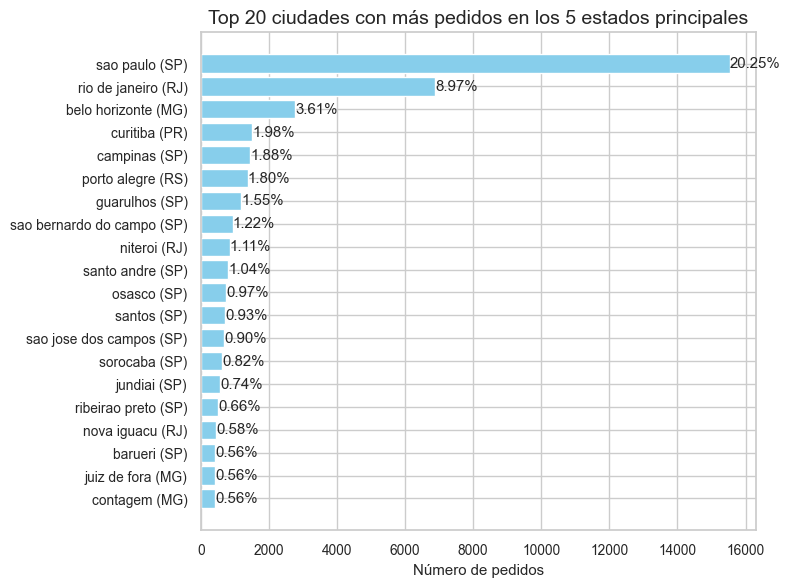

In [30]:
top_cities = sorted_table.sort_values('num_orders', ascending=False).head(20)

top_cities['city_label'] = top_cities['customer_city'] + ' (' + top_cities['customer_state'] + ')'

plt.figure(figsize=(8, 6))
bars = plt.barh(top_cities['city_label'], top_cities['num_orders'], color='skyblue')

for bar, pct in zip(bars, top_cities['order_pct']):
    plt.text(bar.get_width() + 5, bar.get_y() + bar.get_height()/2,
             f"{pct:.2f}%", va='center')

plt.gca().invert_yaxis()

plt.title('Top 20 ciudades con más pedidos en los 5 estados principales', fontsize=14)
plt.xlabel('Número de pedidos')
plt.tight_layout()

plt.show()

¿Que te transmite esta informacion?

En este gráfico podemos detectar la gran diferencia de pedidos de la primera ciudad respecto a las demás.

Principalmente para aumentar las ventas en las demás ciudades, deberían de fijarse y tomar ideas de Sao Paulo y Rio de Janeiro, que son las 2 ciudades con más ventas, en sus campañas de publicidad o como se desenvuelven a nivel logístico.

¿Que acciones como analista de datos crees que deberia de tomar la empresa para mejorar sus ventas? 

Según los datos, podemos observar que la media de pedidos por cliente es 1, esto se podría mejorar dando descuentos para la segunda compra, puntos acumulativos para obtener un mayor descuento, etc.

Otra forma de aumentar las ventas es mejorando la atención al cliente, con esto quiero decir que se podrían atender mejor las malas reseñas y tenerlas en cuenta para poder mejorar esos aspectos.

In [31]:
df_delivered = df_orders.dropna(subset=['order_delivered_customer_date', 'order_estimated_delivery_date'])

df_delivered['late_days'] = (df_delivered['order_delivered_customer_date'] - df_delivered['order_estimated_delivery_date']).dt.days

df_late_orders = df_delivered[df_delivered['late_days'] > 0]

df_orders_with_city = pd.merge(df_delivered, df_customers[['customer_id', 'customer_city']], on='customer_id', how='left')

df_late_orders_with_city = pd.merge(df_late_orders, df_customers[['customer_id', 'customer_city']], on='customer_id', how='left')

total_by_city = df_orders_with_city.groupby('customer_city')['order_id'].count().rename('total_orders')

late_by_city = df_late_orders_with_city.groupby('customer_city').agg(
    late_orders=('order_id', 'count'),
    avg_late_days=('late_days', 'mean')
)

result = pd.merge(total_by_city, late_by_city, left_index=True, right_index=True)

result['late_percentage'] = (result['late_orders'] / result['total_orders']) * 100

result = result.sort_values(by='late_orders', ascending=False)


result.head(10)


C:\Users\cmuñoz\AppData\Local\Temp\ipykernel_15668\2799534154.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_delivered['late_days'] = (df_delivered['order_delivered_customer_date'] - df_delivered['order_estimated_delivery_date']).dt.days


,total_orders,late_orders,avg_late_days,late_percentage
customer_city,,,,
sao paulo,15046,715,7.534266,4.752094
rio de janeiro,6604,706,13.339943,10.690491
salvador,1188,174,10.810345,14.646465
belo horizonte,2697,137,7.401460,5.079718
porto alegre,1341,136,10.551471,10.141685
campinas,1406,119,7.394958,8.463727
brasilia,2071,118,7.415254,5.697731
niteroi,825,96,13.322917,11.636364
fortaleza,618,94,16.351064,15.210356


C:\Users\cmuñoz\AppData\Local\Temp\ipykernel_15668\639949362.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(top10.index, rotation=45, ha='right')


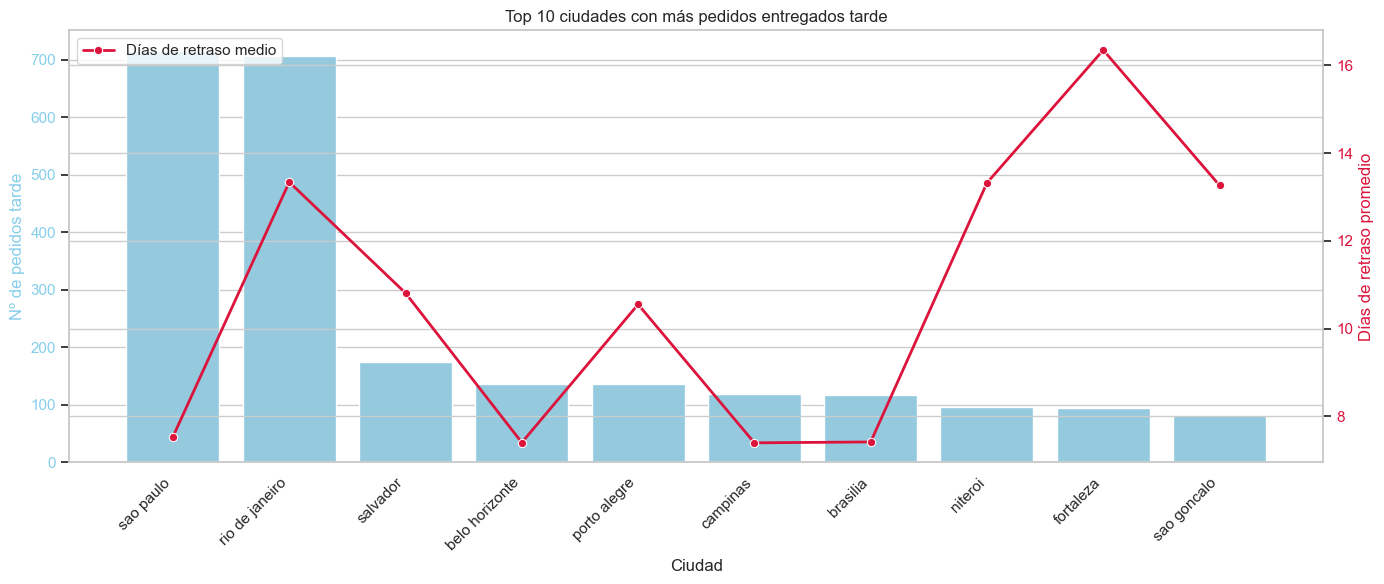

In [32]:
top10 = result.sort_values('late_orders', ascending=False).head(10)

sns.set(style="whitegrid")

fig, ax1 = plt.subplots(figsize=(14, 6))

color_barras = 'skyblue'
color_linea = 'crimson'

sns.barplot(
    x=top10.index,
    y=top10['late_orders'],
    ax=ax1,
    color=color_barras
)
ax1.set_ylabel("Nº de pedidos tarde", color=color_barras)
ax1.set_xlabel("Ciudad")
ax1.tick_params(axis='y', labelcolor=color_barras)
ax1.set_xticklabels(top10.index, rotation=45, ha='right')

ax2 = ax1.twinx()

sns.lineplot(
    x=top10.index,
    y=top10['avg_late_days'],
    ax=ax2,
    color=color_linea,
    marker='o',
    linewidth=2,
    label='Días de retraso medio'
)
ax2.set_ylabel("Días de retraso promedio", color=color_linea)
ax2.tick_params(axis='y', labelcolor=color_linea)

plt.title("Top 10 ciudades con más pedidos entregados tarde")

plt.tight_layout()
plt.show()

In [33]:
df_orders_customers = pd.merge(
    df_orders,
    df_customers[['customer_id', 'customer_state']],
    on='customer_id',
    how='left'
)

df_reviews_full = pd.merge(
    df_orders_customers,
    df_order_reviews[['order_id', 'review_score']],
    on='order_id',
    how='inner'
)

df_reviews_full['is_late'] = pd.to_datetime(df_reviews_full['order_delivered_customer_date']) > pd.to_datetime(df_reviews_full['order_estimated_delivery_date'])

reviews_all = df_reviews_full.copy()
reviews_on_time = df_reviews_full[~df_reviews_full['is_late']]

reviews_grouped = reviews_all.groupby('customer_state').agg(
    total_reviews=('review_score', 'count')
)

score_grouped = reviews_on_time.groupby('customer_state').agg(
    avg_score=('review_score', 'mean')
)

result_reviews = pd.merge(reviews_grouped, score_grouped, on='customer_state')
result_reviews = result_reviews.sort_values('total_reviews', ascending=False)
print(result_reviews.head(10))

                total_reviews  avg_score
customer_state                          
SP                      41690   4.249650
RJ                      12765   4.130884
MG                      11625   4.219565
RS                       5483   4.254852
PR                       5038   4.244421
SC                       3623   4.223339
BA                       3357   4.059450
DF                       2148   4.186593
GO                       2024   4.169255
ES                       2016   4.213925


C:\Users\cmuñoz\AppData\Local\Temp\ipykernel_15668\356664040.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(top_states.index)


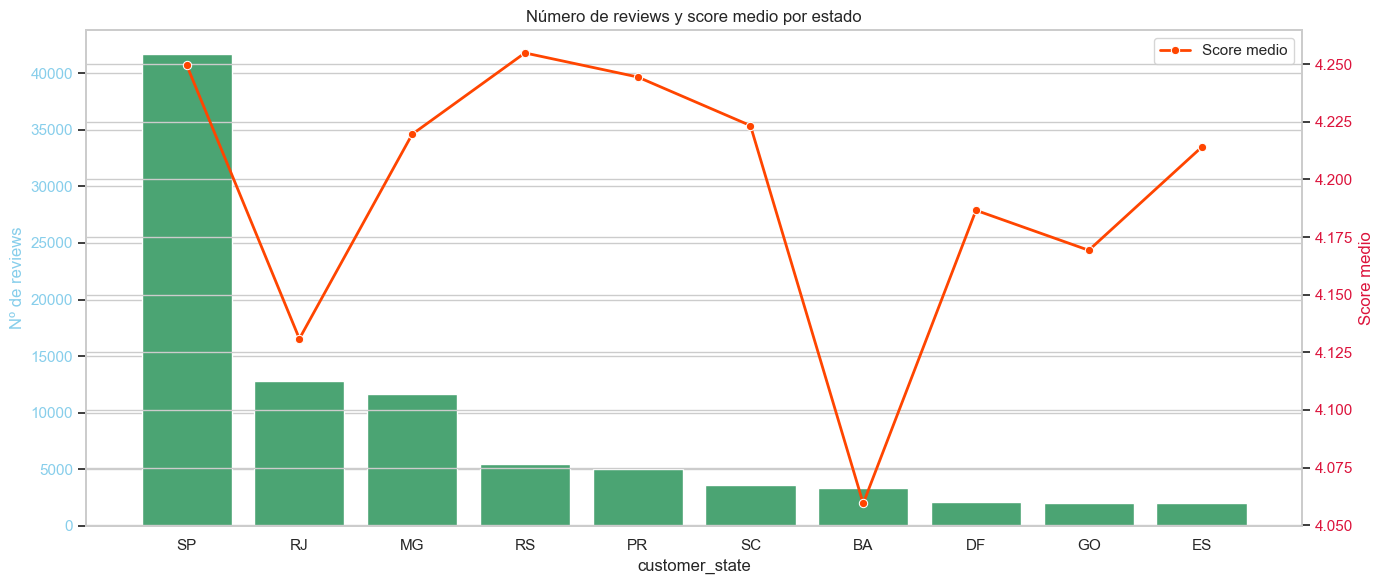

In [34]:
top_states = result_reviews.head(10)

sns.set(style="whitegrid")
fig, ax1 = plt.subplots(figsize=(14, 6))

sns.barplot(
    x=top_states.index,
    y=top_states['total_reviews'],
    ax=ax1,
    color='mediumseagreen'
)
ax1.set_ylabel("Nº de reviews", color=color_barras)
ax1.tick_params(axis='y', labelcolor=color_barras)
ax1.set_xticklabels(top_states.index)

ax2 = ax1.twinx()
sns.lineplot(
    x=top_states.index,
    y=top_states['avg_score'],
    ax=ax2,
    color='orangered',
    marker='o',
    linewidth=2,
    label='Score medio'
)
ax2.set_ylabel("Score medio", color=color_linea)
ax2.tick_params(axis='y', labelcolor=color_linea)

plt.title("Número de reviews y score medio por estado")
plt.tight_layout()
plt.show()

In [35]:
df_orders_with_state = pd.merge(
    df_orders,
    df_customers[['customer_id', 'customer_state']],
    on='customer_id',
    how='left'
)

df_sent = df_orders_with_state[df_orders_with_state['order_delivered_carrier_date'].notna()]

stats = []

for state in df_sent['customer_state'].dropna().unique():
    df_state = df_sent[df_sent['customer_state'] == state]

    total_sent_state = df_state.shape[0]
    df_state_not_delivered = df_state[df_state['order_delivered_customer_date'].isna()]
    undelivered_count_state = df_state_not_delivered.shape[0]
    undelivered_percentage_state = (undelivered_count_state / total_sent_state) * 100 if total_sent_state > 0 else 0

    stats.append({
        'state': state,
        'total_sent': total_sent_state,
        'undelivered': undelivered_count_state,
        'undelivered_percentage': undelivered_percentage_state
    })

    print(f"--- {state} ---")
    print(f"Total de pedidos enviados: {total_sent_state}")
    print(f"Pedidos enviados pero NO entregados: {undelivered_count_state}")
    print(f"Porcentaje sobre el total de enviados: {undelivered_percentage_state:.2f}%")
    print()


--- SP ---
Total de pedidos enviados: 40858
Pedidos enviados pero NO entregados: 364
Porcentaje sobre el total de enviados: 0.89%

--- BA ---
Total de pedidos enviados: 3327
Pedidos enviados pero NO entregados: 71
Porcentaje sobre el total de enviados: 2.13%

--- GO ---
Total de pedidos enviados: 1989
Pedidos enviados pero NO entregados: 32
Porcentaje sobre el total de enviados: 1.61%

--- RN ---
Total de pedidos enviados: 481
Pedidos enviados pero NO entregados: 7
Porcentaje sobre el total de enviados: 1.46%

--- PR ---
Total de pedidos enviados: 4954
Pedidos enviados pero NO entregados: 31
Porcentaje sobre el total de enviados: 0.63%

--- RJ ---
Total de pedidos enviados: 12658
Pedidos enviados pero NO entregados: 305
Porcentaje sobre el total de enviados: 2.41%

--- RS ---
Total de pedidos enviados: 5382
Pedidos enviados pero NO entregados: 38
Porcentaje sobre el total de enviados: 0.71%

--- MG ---
Total de pedidos enviados: 11432
Pedidos enviados pero NO entregados: 77
Porcentaje 

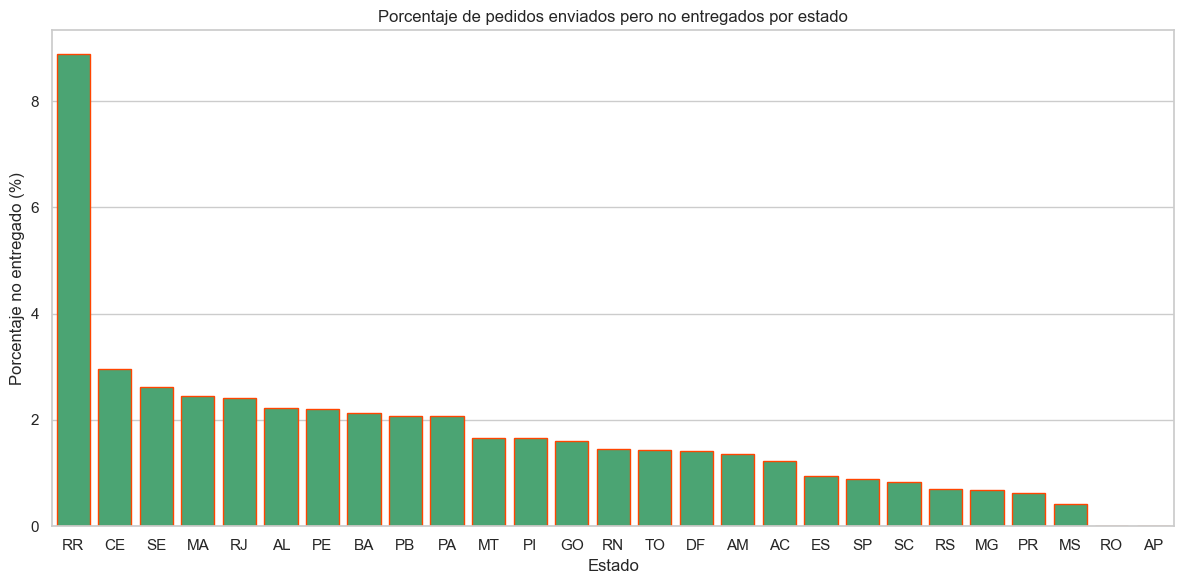

In [36]:
df_stats = pd.DataFrame(stats)

df_stats = df_stats.sort_values('undelivered_percentage', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_stats,
    x='state',
    y='undelivered_percentage',
    color='mediumseagreen',
    edgecolor='orangered'
)
plt.title('Porcentaje de pedidos enviados pero no entregados por estado')
plt.ylabel('Porcentaje no entregado (%)')
plt.xlabel('Estado')
plt.tight_layout()
plt.show()

In [37]:
df_reviews_products = pd.merge(
    df_order_items[['order_id', 'product_id']],
    df_order_reviews[['order_id', 'review_score']],
    on='order_id',
    how='inner'
)

product_review_stats = df_reviews_products.groupby('product_id').agg(
    avg_score=('review_score', 'mean'),
    num_reviews=('review_score', 'count')
).reset_index()

product_review_stats_filtered = product_review_stats[product_review_stats['num_reviews'] >= 100]

df_full = pd.merge(
    product_review_stats_filtered,
    df_products[['product_id', 'product_category_name']],
    on='product_id',
    how='left'
)

best_product_named = df_full.sort_values('avg_score', ascending=False).iloc[0]
worst_product_named = df_full.sort_values('avg_score', ascending=True).iloc[0]

print("Producto mejor valorado:")
print(f"ID: {best_product_named['product_id']}")
print(f"Categoría: {best_product_named['product_category_name']}")
print(f"Puntuación media: {best_product_named['avg_score']:.2f}")
print(f"Número de reviews: {best_product_named['num_reviews']}")

print("\nProducto peor valorado:")
print(f"ID: {worst_product_named['product_id']}")
print(f"Categoría: {worst_product_named['product_category_name']}")
print(f"Puntuación media: {worst_product_named['avg_score']:.2f}")
print(f"Número de reviews: {worst_product_named['num_reviews']}")

Producto mejor valorado:
ID: e0cf79767c5b016251fe139915c59a26
Categoría: beleza_saude
Puntuación media: 4.48
Número de reviews: 136

Producto peor valorado:
ID: 36f60d45225e60c7da4558b070ce4b60
Categoría: informatica_acessorios
Puntuación media: 3.29
Número de reviews: 136


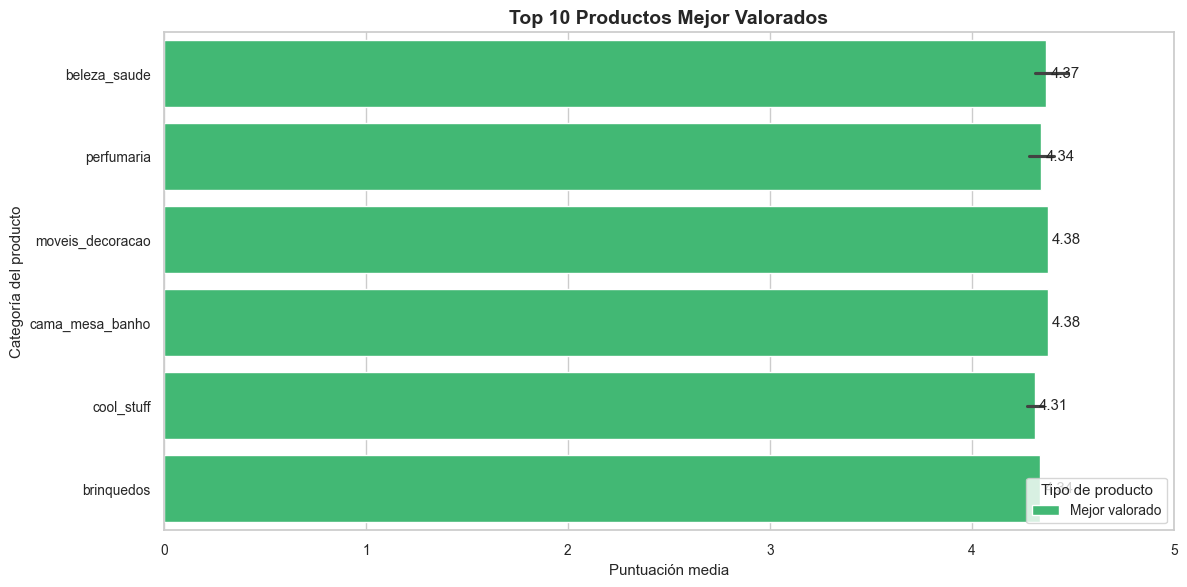

In [38]:
top10_best = df_full.sort_values('avg_score', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.set(style="whitegrid", font_scale=0.9)

top10_best['Tipo'] = 'Mejor valorado'

palette = {'Mejor valorado': '#2ecc71'}

ax_best = sns.barplot(
    data=top10_best,
    x='avg_score',
    y='product_category_name',
    hue='Tipo',
    dodge=False,
    palette=palette
)

plt.title('Top 10 Productos Mejor Valorados', fontsize=14, weight='bold')
plt.xlabel('Puntuación media')
plt.ylabel('Categoría del producto')
plt.legend(title='Tipo de producto', loc='lower right')
plt.xlim(0, 5)

for container in ax_best.containers:
    ax_best.bar_label(container, fmt='%.2f', label_type='edge', padding=3)

plt.tight_layout()
plt.show()

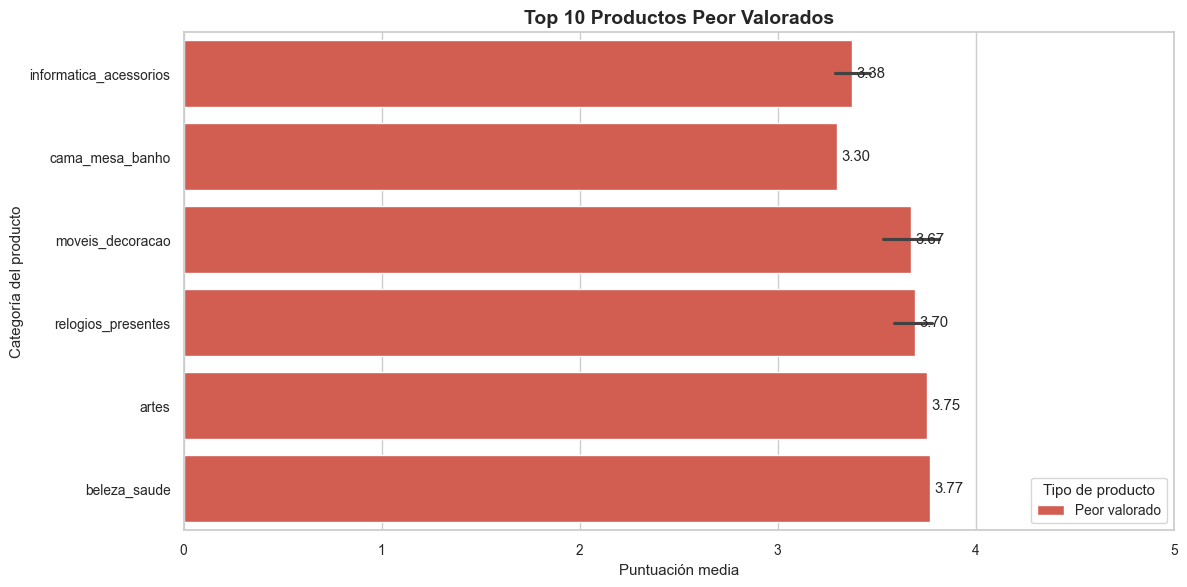

In [41]:
top10_worst = df_full.sort_values('avg_score', ascending=True).head(10)

plt.figure(figsize=(12, 6))
sns.set(style="whitegrid", font_scale=0.9)

top10_worst['Tipo'] = 'Peor valorado'

palette = {'Peor valorado': '#e74c3c'}

ax_worst = sns.barplot(
    data=top10_worst,
    x='avg_score',
    y='product_category_name',
    hue='Tipo',
    dodge=False,
    palette=palette
)

plt.title('Top 10 Productos Peor Valorados', fontsize=14, weight='bold')
plt.xlabel('Puntuación media')
plt.ylabel('Categoría del producto')
plt.legend(title='Tipo de producto', loc='lower right')
plt.xlim(0, 5)

for container in ax_worst.containers:
    ax_worst.bar_label(container, fmt='%.2f', label_type='edge', padding=3)

plt.tight_layout()
plt.show()

In [40]:
df_oi_orders = df_order_items.merge(
    df_orders[['order_id', 'order_delivered_customer_date', 'order_estimated_delivery_date']],
    on='order_id'
)

df_oi_orders_reviews = df_oi_orders.merge(
    df_order_reviews[['order_id', 'review_score']],
    on='order_id',
    how='left'
)

df_seller_metrics = df_oi_orders_reviews.groupby('seller_id').agg(
    total_pedidos=('order_id', 'nunique'),
    review_media=('review_score', 'mean')
).reset_index().round(2)

df_seller_metrics.sort_values(by='total_pedidos', ascending=False, inplace=True)
print(df_seller_metrics)


                             seller_id  total_pedidos  review_media
1235  6560211a19b47992c3666cc44a7e94c0           1854          3.91
881   4a3ca9315b744ce9f8e9374361493884           1806          3.80
2481  cc419e0650a3c5ba77189a1882b7556a           1706          4.07
368   1f50f920176fa81dab994f9023523100           1404          3.98
2643  da8622b14eb17ae2831f4ac5b9dab84a           1314          4.07
...                                ...            ...           ...
2473  cb810bd318f51b3dc3c753944d61a1fa              1          4.00
2469  cb4a705d00e100b9732d0ca34817d441              1          1.00
2494  cd233f8bfa30ebfd651f47ee7d054951              1          5.00
2493  cd2169d9f31ff6fbb9ca3373b0c9e354              1          4.00
2488  ccbd753e6863fe7314dc6c0ca5a074e7              1          4.00

[3095 rows x 3 columns]
